<a href="https://colab.research.google.com/github/HesterWen/Student_Performance/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings('ignore')

## 載入資料

In [ ]:
url = 'https://raw.githubusercontent.com/HesterWen/Student_Performance/refs/heads/main/student-performance.csv?token=GHSAT0AAAAAACZY7MLNW65RPBTNG2Z5E65MZZ2BASA'
c = requests.get(url).content
df = pd.read_csv(io.StringIO(c.decode('utf-8')))  # 將解碼後的字串當作檔案

df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## 處理缺失值

In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


### 將Extracurricular Activities特徵編碼

In [ ]:
label = {'Yes': 1, 'No': 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(label)
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6011,7,45,1,7,2,34.0
535,6,87,0,7,9,76.0
2691,5,98,1,4,6,87.0
8030,3,82,0,6,6,65.0
1218,3,86,1,5,1,67.0


## 視覺化分析

* 各個特徵間的分布狀態圖

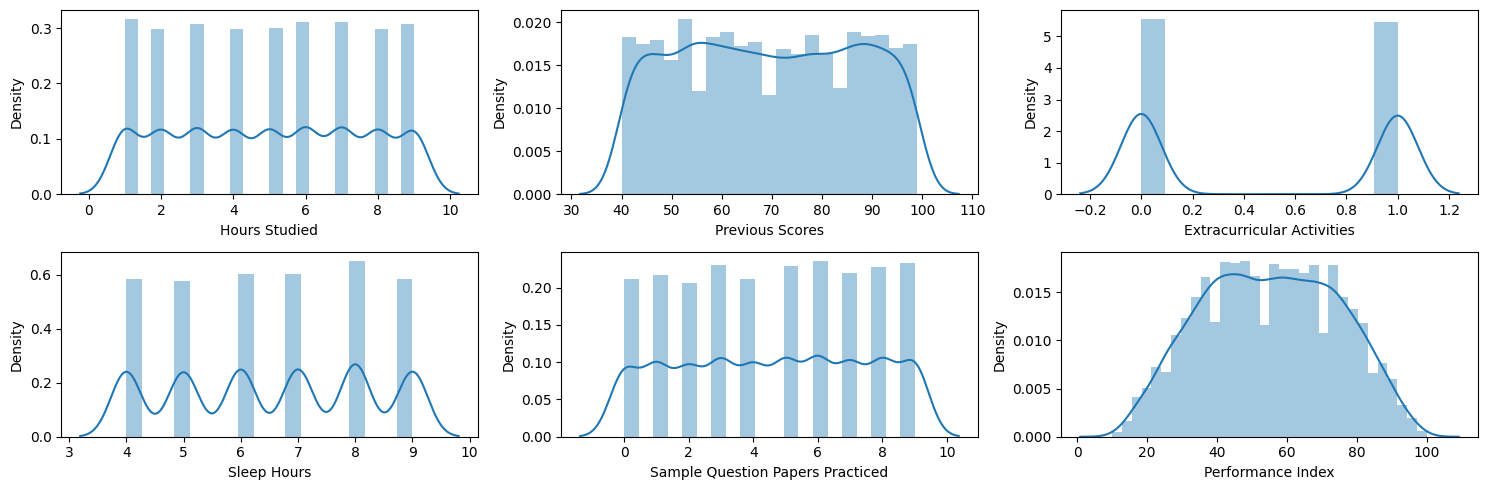

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3)
axes = axes.flatten()
fig.set_size_inches(15, 5)
columns = df.select_dtypes(include=[float, int]).columns
for i, col in enumerate(columns):
  sns.distplot(df[col][:], ax=axes[i])
plt.tight_layout()
plt.show()

* Previous Scores 與 Performance Index 成正比關係


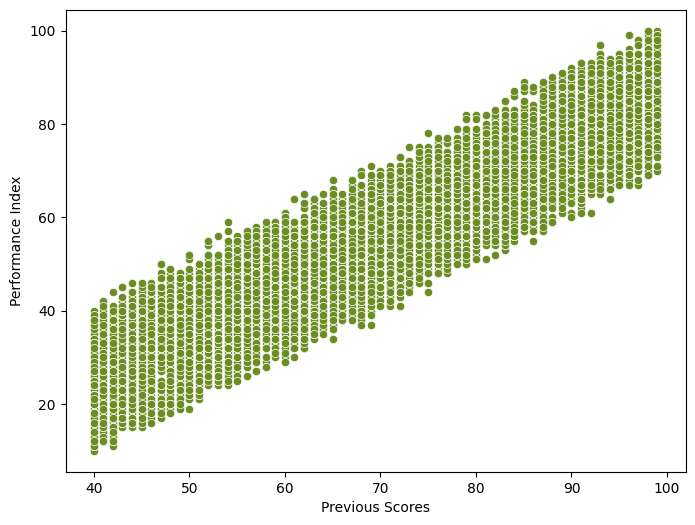

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Previous Scores', y='Performance Index', data=df, color='olivedrab')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.show()

* Hours Studied 與 Performance Index 的關係圖

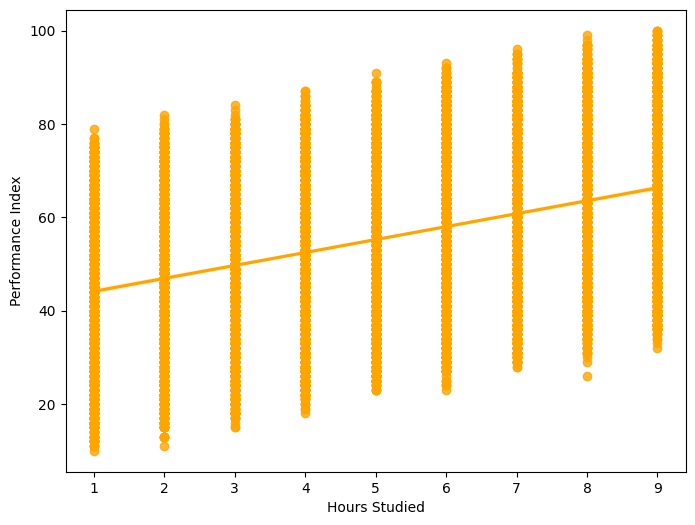

In [ ]:
plt.subplots(figsize=(8, 6))
sns.regplot(x='Hours Studied', y='Performance Index', data=df, color='orange')
plt.show()

* Sleep Hours 與 Performance Index 的關係圖

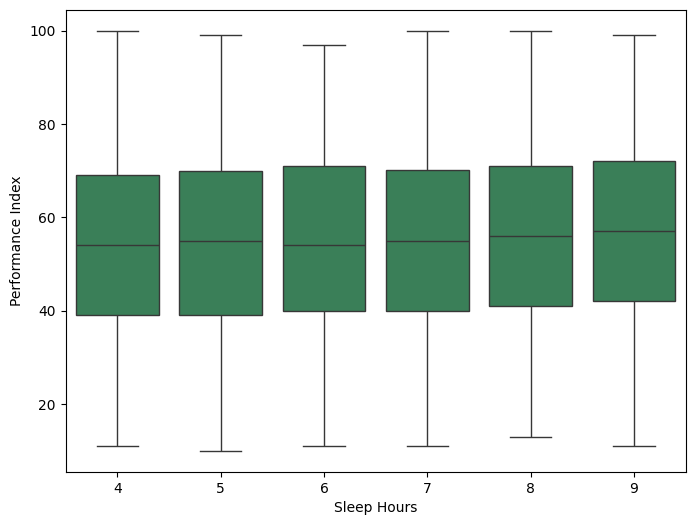

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Hours', y='Performance Index', data=df, color='seagreen')
plt.show()

## 切割訓練集與測試集

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

## 正規化

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (7000, 5)
Testing data shape:  (3000, 5)


## 建立 Linear Regression 模型

In [ ]:
# 建立模型
model = LinearRegression()
# 利用訓練集資料訓練模型
model.fit(X_train, y_train)
# 預測測試集
predicted = model.predict(X_test)
predicted

array([29.84950913, 30.63605901, 54.47134414, ..., 89.53952509,
       55.79719986, 57.87340058])

In [ ]:
# 斜率
model.coef_

array([ 7.40605321, 17.71825932,  0.31406061,  0.80594338,  0.55016816])

In [ ]:
# 截距
model.intercept_

55.136857142857146

## 模型評估

In [ ]:
r2 = r2_score(y_test, predicted)
mse = mean_squared_error(y_test, predicted)

print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R2 Score: 0.99
Mean Squared Error (MSE): 4.04
